Seepark GPS Reference Point
===

Date: 23.11.2022

Time: 12:48:37 - 13:18:09 GMT+1

Duration: 0:29:32

Movement: Static

GPS update period: 0.25 s

## Brief data view from u-center

![](brief.png)

## Summary of the Analysis

- Positioning accuracy was extremely well when carrier range status was fixed
  - For altitude: Fell into the exact 0.1 m for most of the time and at most 0.4 m error
  - For position: Fell into the error range (0.8 - 1.1 m) of the reference point most of the time, so the accuracy is 1.1 m or better
- When carrier range ambiguities were not fully fixed, error was up to 3.3 m in both altitude and surface position
- Carrier-phase ambiguities were not fixed all the time. Only about half of the time they were fixed throughout the whole test
- Losing track of carrier-phase occasionally led to high deviation in the positioning and took a few minutes to be recovered

# Data Pre-processing

## Load CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

filename = "tableview_221210_011603_full.csv"  # update csv filename here

frequency = 4   # update data update rate

# Reference point information
ref_lla = [48.012317, 7.813296, 289.4]  # Geodetic: Lat, Lon, Alt (HAE)
ref_lla_err = [1.1, 0.8, 0.1 ]  # errors in m
ref_ecef = [4235206.8, 581152.46, 4718007.72]  # Earth Centered - Earth Fixed: x, y, z

df = pd.read_csv(filename)

# Convert UTC column to datetime
df["UTC"] = pd.to_datetime(df["UTC"])

## Additional Data

In [2]:
df["DGPS"] = df["DGPS"].eq("Yes").astype(int)
df["dT"] = df["UTC"].diff() / np.timedelta64(1, "s")
df["Alt (HAE) Rate of Change"] = df["Alt (HAE)"].diff() * df["dT"]
df["Alt Error"] = df["Alt (HAE)"] - ref_lla[2]
df["ECEF Error X"] = df["X"] - ref_ecef[0]
df["ECEF Error Y"] = df["Y"] - ref_ecef[1]
df["ECEF Error Z"] = df["Z"] - ref_ecef[2]
df["ECEF Error"] = np.sqrt(df["ECEF Error X"] ** 2 + df["ECEF Error Y"] ** 2 + df["ECEF Error Z"] ** 2)

## Unuseful a.t.m
df["X Diff"] = df["X"].diff()
df["Y Diff"] = df["Y"].diff()
df["Z Diff"] = df["Z"].diff()
df["Distance Change"] = np.sqrt(df["X Diff"] ** 2 + df["Y Diff"] ** 2 + df["Z Diff"] ** 2)
df["Velocity"] = df["Distance Change"] * df["dT"]

# Summary of data frame
df.info()
pd.set_option('display.max_columns', None)
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7090 entries, 0 to 7089
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     7090 non-null   int64         
 1   UTC                       7090 non-null   datetime64[ns]
 2   GPS time                  7090 non-null   object        
 3   Fix type (GPS)            7090 non-null   object        
 4   DGPS                      7090 non-null   int64         
 5   Carrier Range Status      7090 non-null   int64         
 6   X                         7090 non-null   float64       
 7   Y                         7090 non-null   float64       
 8   Z                         7090 non-null   float64       
 9   Lat                       7090 non-null   float64       
 10  Lon                       7090 non-null   float64       
 11  Alt (HAE)                 7090 non-null   float64       
 12  Alt (MSL)           

Index                     UTC         GPS time Fix type (GPS)  DGPS  \
7087   7087 2022-11-23 12:18:09.250  2237:303507.250             3D     1   
7088   7088 2022-11-23 12:18:09.500  2237:303507.500             3D     1   
7089   7089 2022-11-23 12:18:09.750  2237:303507.750             3D     1   

      Carrier Range Status            X           Y            Z        Lat  \
7087                     2  4235206.837  581152.488  4718007.687  48.012316   
7088                     2  4235206.837  581152.488  4718007.687  48.012316   
7089                     2  4235206.837  581152.488  4718007.687  48.012316   

           Lon  Alt (HAE)  Alt (MSL)  VX  VY  VZ  VN  VE  VD   SoG  VACC 3D  \
7087  7.813296      289.4      242.1 NaN NaN NaN NaN NaN NaN  0.00      NaN   
7088  7.813296      289.4      242.1 NaN NaN NaN NaN NaN NaN  0.01      NaN   
7089  7.813296      289.4      242.1 NaN NaN NaN NaN NaN NaN  0.01      NaN   

      2d Err  HDOP  VDOP  PDOP  SVs Tracked  SVs Used  \
7087     NaN   0.8   1.5   1.7           46        22   
7088     NaN   0.8   1.5   1.7           46        22   
7089     NaN   0.8   1.5   1.7           46        22   

                                               Used SVs    dT  \
7087  G5 G7 G13 G14 G15 G18 G20 G30 R4 R5 R6 R14 R15...  0.25   
7088  G5 G7 G13 G14 G15 G18 G20 G30 R4 R5 R6 R14 R15...  0.25   
7089  G5 G7 G13 G14 G15 G18 G20 G30 R4 R5 R6 R14 R15...  0.25   

      Alt (HAE) Rate of Change  Alt Error  ECEF Error X  ECEF Error Y  \
7087                       0.0        0.0         0.037         0.028   
7088                       0.0        0.0         0.037         0.028   
7089                       0.0        0.0         0.037         0.028   

      ECEF Error Z  ECEF Error  X Diff  Y Diff  Z Diff  Distance Change  \
7087        -0.033    0.056939     0.0     0.0     0.0              0.0   
7088        -0.033    0.056939     0.0     0.0     0.0              0.0   
7089        -0.033    0.056939     0.0     0.0     0.0              0.0   

      Velocity  
7087       0.0  
7088       0.0  
7089       0.0

# Basic Statistics

In [3]:
print("Number of data points:", df["Index"].count())

idx_RTK_lockin = df.loc[(df["DGPS"] == 1) & (df["Carrier Range Status"] > 0)].index[0]

print(f"Index of first RTK lock-in: {idx_RTK_lockin}")

df.describe()

Number of data points: 7090
Index of first RTK lock-in: 60


Index         DGPS  Carrier Range Status             X  \
count  7090.000000  7090.000000           7090.000000  7.090000e+03   
mean   3544.500000     0.991678              1.495910  4.235207e+06   
std    2046.851037     0.090849              0.570392  6.865656e-01   
min       0.000000     0.000000              0.000000  4.235202e+06   
25%    1772.250000     1.000000              1.000000  4.235207e+06   
50%    3544.500000     1.000000              2.000000  4.235207e+06   
75%    5316.750000     1.000000              2.000000  4.235207e+06   
max    7089.000000     1.000000              2.000000  4.235208e+06   

                   Y             Z          Lat          Lon    Alt (HAE)  \
count    7090.000000  7.090000e+03  7090.000000  7090.000000  7090.000000   
mean   581152.061643  4.718008e+06    48.012317     7.813291   289.354090   
std         0.589236  4.532719e-01     0.000004     0.000008     0.720457   
min    581150.350000  4.718005e+06    48.012313     7.813271   284.600000   
25%    581151.601000  4.718008e+06    48.012316     7.813284   289.400000   
50%    581152.474000  4.718008e+06    48.012317     7.813296   289.400000   
75%    581152.486000  4.718008e+06    48.012317     7.813296   289.500000   
max    581152.597000  4.718010e+06    48.012358     7.813298   290.300000   

         Alt (MSL)   VX   VY   VZ         VN         VE   VD         SoG  \
count  7090.000000  0.0  0.0  0.0  62.000000  62.000000  0.0  7090.00000   
mean    242.054090  NaN  NaN  NaN   0.101290  -0.139032  NaN     0.01733   
std       0.720457  NaN  NaN  NaN   0.320105   0.263499  NaN     0.04329   
min     237.300000  NaN  NaN  NaN  -0.490000  -0.970000  NaN     0.00000   
25%     242.100000  NaN  NaN  NaN  -0.040000  -0.287500  NaN     0.01000   
50%     242.100000  NaN  NaN  NaN   0.050000  -0.185000  NaN     0.01000   
75%     242.200000  NaN  NaN  NaN   0.167500   0.050000  NaN     0.02000   
max     243.000000  NaN  NaN  NaN   1.790000   0.550000  NaN     1.83000   

       VACC 3D  2d Err         HDOP         VDOP         PDOP  SVs Tracked  \
count      0.0     0.0  7090.000000  7090.000000  7090.000000  7090.000000   
mean       NaN     NaN     0.800790     1.200663     1.462426    43.357828   
std        NaN     NaN     0.023321     0.125508     0.115611     0.804767   
min        NaN     NaN     0.600000     0.900000     1.100000    43.000000   
25%        NaN     NaN     0.800000     1.200000     1.400000    43.000000   
50%        NaN     NaN     0.800000     1.200000     1.500000    43.000000   
75%        NaN     NaN     0.800000     1.200000     1.500000    43.000000   
max        NaN     NaN     0.900000     1.800000     2.000000    46.000000   

          SVs Used       dT  Alt (HAE) Rate of Change    Alt Error  \
count  7090.000000  7089.00               7089.000000  7090.000000   
mean     24.483780     0.25                  0.000049    -0.045910   
std       1.140357     0.00                  0.006355     0.720457   
min      11.000000     0.25                 -0.150000    -4.800000   
25%      24.000000     0.25                  0.000000     0.000000   
50%      25.000000     0.25                  0.000000     0.000000   
75%      25.000000     0.25                  0.000000     0.100000   
max      26.000000     0.25                  0.075000     0.900000   

       ECEF Error X  ECEF Error Y  ECEF Error Z   ECEF Error       X Diff  \
count   7090.000000   7090.000000   7090.000000  7090.000000  7089.000000   
mean       0.027864     -0.398357     -0.033772     0.605119     0.000579   
std        0.686566      0.589236      0.453272     0.904674     0.022094   
min       -5.126000     -2.110000     -3.204000     0.005385    -0.672000   
25%        0.024000     -0.859000     -0.033000     0.040645     0.000000   
50%        0.025000      0.014000     -0.020000     0.056939     0.000000   
75%        0.162000      0.026000      0.079000     1.167809     0.000000   
max        0.977000      0.137000      1.989

## Navigation Status

In [4]:
# Helper Functions
# TODO: Make it a module for import

def highlight_carrier_status(ax, df):
    idxes = df[df["Carrier Range Status"].diff() != 0 ].index.tolist()
    idxes.append(df.index.max()+1)
    
    for start, end in zip(idxes, idxes[1:]):
        status = df["Carrier Range Status"][start]
        if status == 1:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="blue")
        elif status == 2:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="green")
        else:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="red")


In [5]:
print("Red region: No solution for carrier-phase measurement (carrier-range status = 0)")
print("Blue region: Float mode for carrier range. Not all carrier-phase ambiguities are resolved. (carrier-range status = 1)")
print("Green resion: Fix mode for carrier range. All carrier-phase ambiguities are resolved. (carrier-range status = 2)")

fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

df.plot(ax=ax[0],
        title="Satellites and carrier range status",
        x="UTC",
        y=["SVs Tracked", "SVs Used"],
        ylabel="Number of Satellites",
        grid=True)

df.plot(ax=ax[1],
        title="Carrier range and DGPS status",
        x="UTC",
        y=["Carrier Range Status", "DGPS"],
        ylabel="Status",
        grid=True)

df.plot(ax=ax[2],
        title="DOPs",
        x="UTC",
        y=["VDOP", "HDOP", "PDOP"],
        ylabel="DOP value",
        grid=True)

for i in range(3):
    highlight_carrier_status(ax[i], df)

plt.show()

df_cs = df["Carrier Range Status"]
df_cs_total_cnt = df_cs.count()
df_cs_nofix_cnt = df_cs[df_cs == 0].count()
df_cs_float_cnt = df_cs[df_cs == 1].count()
df_cs_fix_cnt = df_cs[df_cs == 2].count()

print(f"Total no. of data points = {df_cs_total_cnt}")
print(f"Data points without carrier range availability = {df_cs_nofix_cnt} ({df_cs_nofix_cnt / df_cs_total_cnt * 100:0.2f}%)")
print(f"Data points with \"float\" carrier range status = {df_cs_float_cnt} ({df_cs_float_cnt / df_cs_total_cnt * 100:0.2f}%)")
print(f"Data points with \"fix\" carrier range status = {df_cs_fix_cnt} ({df_cs_fix_cnt / df_cs_total_cnt * 100:0.2f}%)")

Red region: No solution for carrier-phase measurement (carrier-range status = 0)
Blue region: Float mode for carrier range. Not all carrier-phase ambiguities are resolved. (carrier-range status = 1)
Green resion: Fix mode for carrier range. All carrier-phase ambiguities are resolved. (carrier-range status = 2)


Total no. of data points = 7090
Data points without carrier range availability = 267 (3.77%)
Data points with "float" carrier range status = 3040 (42.88%)
Data points with "fix" carrier range status = 3783 (53.36%)


### Observations

- High number of satellites in track/ used
- Carrier-phase range solution available for most of the time, but only half of the time the ambiguities are fully fixed.
- DOPs are lower before RTK lock-in, which is unreasonable. May ignore them for now.

### Altitude (HAE)

In [6]:
###
# Plot altitude vs time
###

print(f"Altitude of reference point: {ref_lla[2]} m +- {ref_lla_err[2]} m")

fig1, ax = plt.subplots(1, 1, figsize=(18, 5), sharex=True)
ax.set_title("Altitude (HAE)")
df.plot(ax=ax, x="UTC", y="Alt (HAE)", grid=True)
ax.set_ylabel("Altidude (HAE) in m")
highlight_carrier_status(ax, df)  # highight region according to carrier-phase status

## Carrier phase status
#ax[1].set_ylabel("Status")
#df.plot(ax=ax[1], x="UTC", y=["Carrier Range Status", "DGPS"], grid=True)

## VDOP
#ax[2].set_ylabel("VDOP")
#df.plot(ax=ax[2], x="UTC", y="VDOP", style='g-', grid=True)
#ax[0].set_xlabel("Time (UTC)")

#for i in range(3):
#    ax[i].axvspan(df["UTC"][0], df["UTC"][idx_RTK_lockin], alpha=0.2, color="red")

plt.show()

Altitude of reference point: 289.4 m +- 0.1 m


### Errors in Altitude

In [7]:
###
# Helper functions for error evaluatinn
###

def ecdf(a: np.array):
    """
    Returns a tuple (value, #occurence) of the fiven data vector a
    """
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_error_hist_acdf_stat(ds, bins, quantile, hist_title, acdf_title, xlabel, unit):
    
    # Plot histogram
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ds.hist(ax=ax[0], bins=bins)
    ax[0].set_title(hist_title)
    ax[0].set_ylabel("Frequency")
    ax[0].set_xlabel(f"{xlabel} ({unit})")
    , 
    # Plot CDF
    ds_abs = np.absolute(ds)
    x, cusum = ecdf(ds_abs)
    
    ax[1].plot(x, cusum)
    #ds_abs.hist(ax=ax[1], cumulative=True, density=False, bins=bins, histtype="stepfilled")
    ax[1].set_title(acdf_title)
    ax[1].set_ylabel("Likelihood of occurrence")
    ax[1].set_xlabel(f"{xlabel} ({unit})")
    ax[1].set_ylim((0.0, 1.1))
    plt.show()
    
    # List out statistics
    print("===Statistics (After RTK In-force)===")
    print("mean:", ds.mean(), unit)
    print("median:", ds.median(), unit)
    print("max:", ds.max(), unit)
    print("min:", ds.min(), unit)

    for q in quantile:
        print(f"Absolute error - {(int)(q*100):d}th-percentile: {ds_abs.quantile(q=q)} {unit}")

In [8]:
###
# Plot errors
###

ax = df.plot(title="Altitude error",
        x="UTC",
        y=["Alt Error"],
        ylabel="Altitude error (m)",
        grid=True,
        figsize=(18,5))
ax.axvspan(df["UTC"][0], df["UTC"][idx_RTK_lockin], alpha=0.2, color="red")
highlight_carrier_status(ax, df)

plt.show()

# Plot histogram and CDF to check distribution
alt_err = df["Alt Error"][idx_RTK_lockin:]  # filter non-RTk data
alt_bins = (int)(math.ceil((alt_err.max() - alt_err.min())*10))
plot_error_hist_acdf_stat(ds = alt_err,
                          bins = alt_bins,
                          quantile = [0.95, 0.75, 0.5, 0.25],
                          hist_title = "Distribution of Altitude Error (After RTK In-force)",
                          acdf_title = "CDF of Absolute Altitude Error (After RTK In-force)",
                          xlabel = "Altitude Error",
                          unit = "m")

===Statistics (After RTK In-force)===
mean: -0.02209103840681814 m
median: 0.0 m
max: 0.9000000000000341 m
min: -4.7999999999999545 m
Absolute error - 95th-percentile: 0.9000000000000341 m
Absolute error - 75th-percentile: 0.4000000000000341 m
Absolute error - 50th-percentile: 0.0 m
Absolute error - 25th-percentile: 0.0 m


### Altitude Error (Carrier Range Fixed Only)

In [9]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 2][idx_RTK_lockin:]
plot_error_hist_acdf_stat(df_carrier_2["Alt Error"],
                          bins = alt_bins,
                          quantile = [0.98, 0.88, 0.5, 0.25],
                          hist_title = "Distribution of ECEF Error (Carrier Range = Fixed Only)",
                          acdf_title = "CDF of Absolute ECEF Error (Carrier Range = Fixed Only)",
                          xlabel = "Error",
                          unit = "m")

===Statistics (After RTK In-force)===
mean: 0.001611603545528182 m
median: 0.0 m
max: 0.10000000000002274 m
min: -0.0999999999999659 m
Absolute error - 98th-percentile: 0.0 m
Absolute error - 88th-percentile: 0.0 m
Absolute error - 50th-percentile: 0.0 m
Absolute error - 25th-percentile: 0.0 m


### Altitude Error (Carrier Range Status = Float Only)

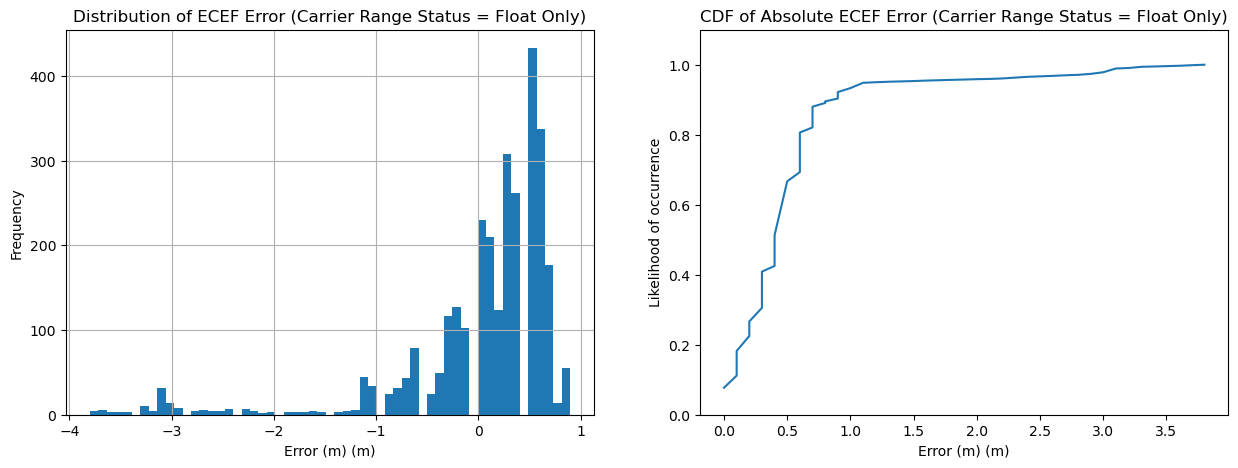

===Statistics (After RTK In-force)===
mean: 0.04073825503357798 m
median: 0.30000000000001137 m
max: 0.9000000000000341 m
min: -3.7999999999999545 m
Absolute error - 95th-percentile: 1.2049999999999597 m
Absolute error - 75th-percentile: 0.6000000000000227 m
Absolute error - 50th-percentile: 0.4000000000000341 m
Absolute error - 25th-percentile: 0.20000000000004547 m


In [10]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 1][idx_RTK_lockin:]
plot_error_hist_acdf_stat(df_carrier_2["Alt Error"],
                          bins = alt_bins,
                          quantile = [0.95, 0.75, 0.5, 0.25],
                          hist_title = "Distribution of ECEF Error (Carrier Range Status = Float Only)",
                          acdf_title = "CDF of Absolute ECEF Error (Carrier Range Status = Float Only)",
                          xlabel = "Error (m)",
                          unit = "m")

### Observations

- Over 50% of the altitude output fall exactly at the reference altitude
- 95% of the output have less than or equal to 0.6 m absolute error
- When carrier range solutions are fully fixed, it is extremely accurate with over 98% of the measurements fall into the exact reference altitude (precision up to 0.1m)
- When carrier range solutions are not fully fixed, accuracy is 0.9m (95th-percentile)

### Position

In [11]:
# Helper function
# TODO: move to python module
def dist_lat_lon_to_meter(lat2, lat1, lon2, lon1):
    # Use Haversine formula to find distance (in m) between 2 point in lat/lon coordinate
    r = 6371  # approximate radius of earth
    
    dlat = math.radians(lat2) - math.radians(lat1)
    dlon = math.radians(lon2) - math.radians(lon1)

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return r * c * 1000

### Position Map

In [12]:
# Select data
loc = df.loc[:, ["Index", "UTC", "Alt (HAE)", "X", "Y", "Z", "Lat", "Lon", "HDOP"]]
loc_rtk = df.loc[:, ["Index", "UTC", "X", "Y", "Z", "Lat", "Lon"]][idx_RTK_lockin:]

# Basic statistics
lat = loc_rtk["Lat"]
lat_max = lat.max()
lat_max_idx = lat.idxmax()
lat_max_utc = loc_rtk["UTC"][lat_max_idx]
lat_min = lat.min()
lat_min_idx = lat.idxmin()
lat_mean = lat.mean()
lat_median = lat.median()
lat_std = lat.std()
lat_var = lat.var()
lat_95til = lat.quantile(q=0.95)

long = loc_rtk["Lon"]
long_max = long.max()
long_max_idx = long.idxmax()
long_max_utc = df["UTC"][long_max_idx]
long_min = long.min()
long_min_idx = long.idxmin()
long_mean = long.mean()
long_median = long.median()
long_std = long.std()
long_var = long.var()
long_95til = long.quantile(q=0.95)

In [13]:
###
# Plot position map
###


div = 0.00002

fig = loc.plot.scatter(title="Position (Lat/Lon)",
                       x="Lon",
                       y="Lat",
                       c="Index",
                       xlim=(long_mean - div, long_mean + div),
                       ylim=(lat_mean - div, lat_mean + div),
                       colormap="viridis",
                       colorbar=True,
                       s=2,
                       grid=True,
                       figsize=(10, 10))
plt.plot(long_median, lat_median, marker="x", markersize=10, markeredgecolor="black")  # mark median position
fig.annotate("Med pos", xy=(long_median, lat_median))  # TODO: add arrow
plt.plot(ref_lla[1], ref_lla[0], marker="x", markersize=10, markeredgecolor="red")  # mark reference point
fig.annotate("Ref. pt", xy=(ref_lla[1], ref_lla[0]))  # TODO: add arrow
plt.show()

print("\n=== Median to Reference Point Error ===")
med_ref_err = dist_lat_lon_to_meter(lat_median, ref_lla[0], long_median, ref_lla[1])
print(f"Surface distance error: {med_ref_err:0.4f} m")


=== Median to Reference Point Error ===
Surface distance error: 0.0386 m


### Position Error (Full RTK Session)

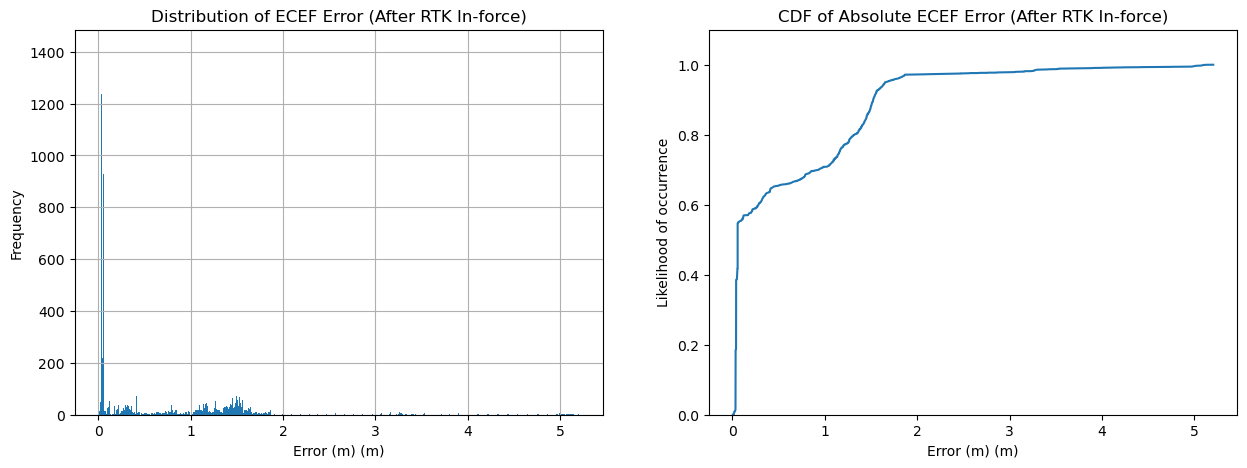

===Statistics (After RTK In-force)===
mean: 0.5663937135201277 m
median: 0.056938563612444565 m
max: 5.205517169444376 m
min: 0.005385164695413804 m
Absolute error - 95th-percentile: 1.6532056739812084 m
Absolute error - 75th-percentile: 1.158376220489678 m
Absolute error - 50th-percentile: 0.056938563612444565 m
Absolute error - 25th-percentile: 0.04064480281429317 m
=== Reference point accuracy ===
Latitude degrees - 1.1 m
Longitude degrees - 0.8 m


In [14]:
ax = df.plot(title="ECEF Position error",
             x="UTC",
             y=["ECEF Error"],
             ylabel="ECEF Position error (m)",
             grid=True,
             figsize=(18,5))
ax.axvspan(df["UTC"][0], df["UTC"][idx_RTK_lockin], alpha=0.2, color="red")
highlight_carrier_status(ax, df)

# Plot histogram and CDF to check distribution
pos_err = df["ECEF Error"][idx_RTK_lockin:]  # filter non-RTK data
pos_bins = (int)(math.ceil((pos_err.max() - pos_err.min())*100))
plot_error_hist_acdf_stat(ds = pos_err,
                          bins = pos_bins,
                          quantile = [0.95, 0.75, 0.5, 0.25],
                          hist_title = "Distribution of ECEF Error (After RTK In-force)",
                          acdf_title = "CDF of Absolute ECEF Error (After RTK In-force)",
                          xlabel = "Error",
                          unit = "m")

print("=== Reference point accuracy ===")
print(f"Latitude degrees - {ref_lla_err[0]} m")
print(f"Longitude degrees - {ref_lla_err[1]} m")

### Position Error (Carrier Range Status = Fixed Only)

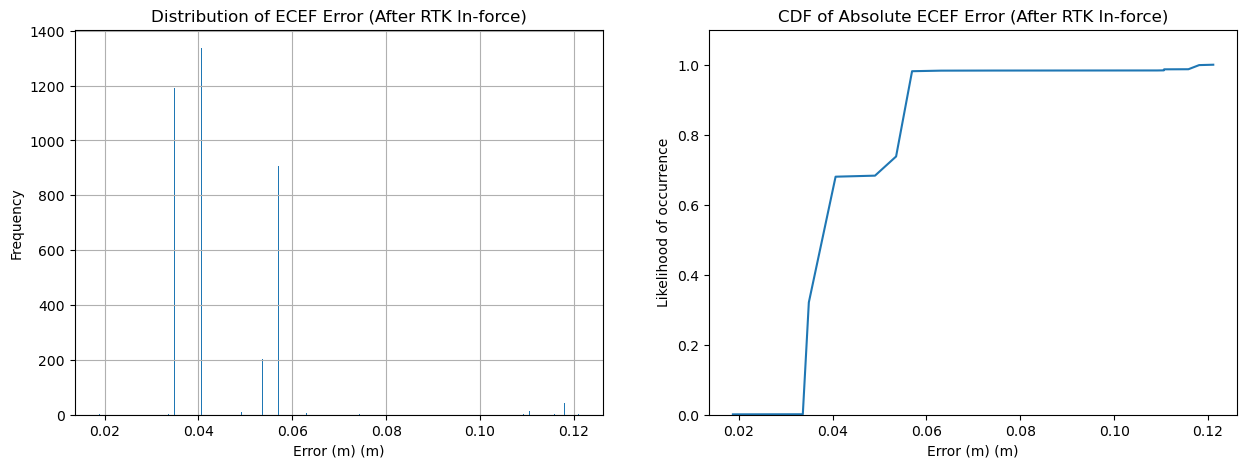

===Statistics (After RTK In-force)===
mean: 0.044808858833631865 m
median: 0.04064480281429317 m
max: 0.12111151896580148 m
min: 0.018761662863172213 m
Absolute error - 95th-percentile: 0.056938563612444565 m
Absolute error - 75th-percentile: 0.056938563612444565 m
Absolute error - 50th-percentile: 0.04064480281429317 m
Absolute error - 25th-percentile: 0.034942810463182754 m


In [15]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 2][idx_RTK_lockin:]
plot_error_hist_acdf_stat(df_carrier_2["ECEF Error"],
                          bins = pos_bins,
                          quantile = [0.95, 0.75, 0.5, 0.25],
                          hist_title = "Distribution of ECEF Error (After RTK In-force)",
                          acdf_title = "CDF of Absolute ECEF Error (After RTK In-force)",
                          xlabel = "Error",
                          unit = "m")

### Position Error (Carrier Range Status = Float Only)

In [16]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 1][idx_RTK_lockin:]
plot_error_hist_acdf_stat(df_carrier_2["ECEF Error"],
                          bins = pos_bins,
                          quantile = [0.95, 0.75, 0.5, 0.25],
                          hist_title = "Distribution of ECEF Error (After RTK In-force)",
                          acdf_title = "CDF of Absolute ECEF Error (After RTK In-force)",
                          xlabel = "Error",
                          unit = "m")

===Statistics (After RTK In-force)===
mean: 1.1246410155072724 m
median: 1.1995065652700467 m
max: 4.005812775907458 m
min: 0.015264337461948893 m
Absolute error - 95th-percentile: 1.8625858370340211 m
Absolute error - 75th-percentile: 1.502122831300777 m
Absolute error - 50th-percentile: 1.1995065652700467 m
Absolute error - 25th-percentile: 0.5818272938677721 m


In [17]:
### 
# Plot latitude, longitude, altitude vs time
###

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(20, 10))
ax[0].set_title("Position (Alt/ Lat/ Lon)")
loc.plot(ax=ax[0], x="UTC", y="Alt (HAE)", xlabel="Time (UTC)", ylabel="Altidude (HAE) in m", grid=True)
loc.plot(ax=ax[1], x="UTC", y="Lat", ylabel="Latitude", style='r-', grid=True)
loc.plot(ax=ax[2], x="UTC", y="Lon", ylabel="Longitude", style='g-', grid=True)

## VDOP
#df.plot(ax=ax[3], x="UTC", y="HDOP", style='y-', grid=True)
#ax[3].set_xlabel("Time (UTC)")
#ax[3].set_ylabel("HDOP")

for i in range(3):
    #ax[i].axvspan(df["UTC"][0], df["UTC"][idx_DGPS_lockin], alpha=0.2, color="red")
    highlight_carrier_status(ax[i], df)
plt.show()

### Observations

- When carrier range solutions were fully fixed, it was extremely accurate with most of the measurements fall into less then 0.6 m from the reference position. However, the reference point has the accuracy up to 0.8 - 1.1 m only. It can only be concluded that the accuracy of the measurements is equal to or better then 1.1 m

- When carrier range solutions were not fully fixed, accuracy was just about 1.8 +- 1.1 m (95th-percentile)

## Ground Speed

In [18]:
###
# Plot ground speed
###

sog = df.loc[:, ["UTC", "SoG"]]

sog.plot(title="Ground speed", x="UTC", y="SoG", xlabel="Time (UTC)", ylabel="Ground speed (m/s)", figsize=(18, 5), grid=True)
plt.show()

### Observations

- Due to deviation in position measurements, ground speed outputs were not 0 for most of the time